# Simple & Multiple Linear Regression

## Height vs Weight - Model with linear regression

Prior to build a linear regression model,  let us make sure that the two variables do have some degree of correlation if we look at the scatterplots.


Below you see a **pairplot** of the data, which contains histograms and scatterplots.  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We'll create a dataframe because it's easier to work with it when doing plots and linear regression:

In [2]:
heights = [155, 166, 162, 164, 164, 163, 152, 165, 170, 167, 162, 180, 
           160, 162, 157, 170, 168, 164, 171, 165, 168, 168, 155, 168, 156, 170]

weights = [50.7, 52.6, 46.0, 79.0, 50.4, 56.7, 49.9, 63.5, 52.2, 58.0, 
           59.0, 75.0, 56.7, 53.5, 50.0, 68.0, 56.0, 62.5, 61.2, 57.0, 
           54.4, 61.2, 52.1, 84.8, 55.3, 61.0]

df = pd.DataFrame({'height': heights, 
                   'weight': weights
                   }
                  )
df.head()

,height,weight
0,155,50.7
1,166,52.6
2,162,46.0
3,164,79.0
4,164,50.4


### Pairplot with `seaborn`

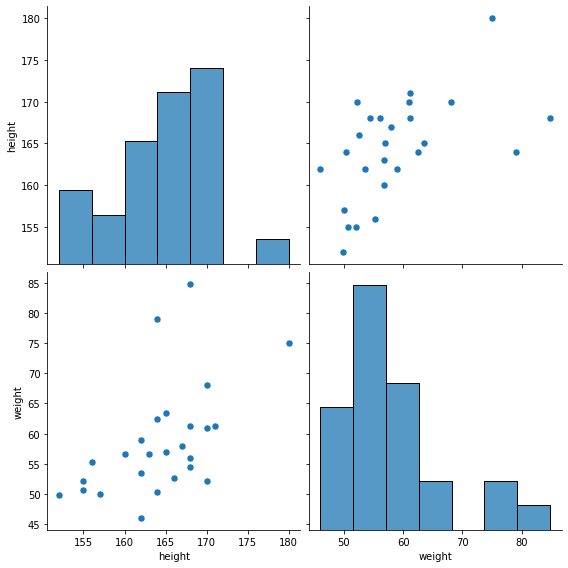

In [3]:
sns.pairplot(df, 
             height=4, 
             plot_kws={"s": 50}
             );

* The tendency of `height` and `weight` to grow together.

We can also calculate their correlation:

In [4]:
df.corr()

,height,weight
height,1.000000,0.531631
weight,0.531631,1.000000


* The r-value, `r = 0.531631`, which is a good correlation coefficient. 

For the p-value for the coefficient, we can use the library `scipy` instead:

In [5]:
import scipy
scipy.stats.pearsonr(df.height, 
                     df.weight
                     )

(0.5316313557662836, 0.005189308365932435)

* The second value in the tuple is the p-value
* As we see it is pretty small: 0.005 ( < 0.05), thus the correlation is statistically significant.

## Linear Regression with `statsmodels`

We'll use the `ols` function from `statsmodels` to learn the linear regression model. 

This function uses an R-like syntax to express the relationship between dependent and indipendent variables:

In [6]:
import statsmodels.formula.api as sm

lm = sm.ols(formula='weight ~ height', 
            data=df
            ).fit()
lm.params

Intercept   -73.465688
height        0.804496
dtype: float64

Based on these two parameters, we can write the linear equation for the relationshop between weight and height:

$$ weight = -73.4 + 0.8 * height $$

We can get all details about the model by calling the `summary` function:

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     9.456
Date:                Tue, 28 Feb 2023   Prob (F-statistic):            0.00519
Time:                        23:18:35   Log-Likelihood:                -89.952
No. Observations:                  26   AIC:                             183.9
Df Residuals:                      24   BIC:                             186.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.4657     43.016     -1.708      0.101    -162.246      15.314
height         0.8045      0.262      3.075      0.005       0.265       1.344
==============================================================================
Omnibus:                       15.044   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.914
Skew:                           1.437   Prob(JB):                     0.000350
Kurtosis:                       5.535   Cond. No.                     4.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plotting linear regression with `seaborn`

In [8]:
df.head()

,height,weight
0,155,50.7
1,166,52.6
2,162,46.0
3,164,79.0
4,164,50.4


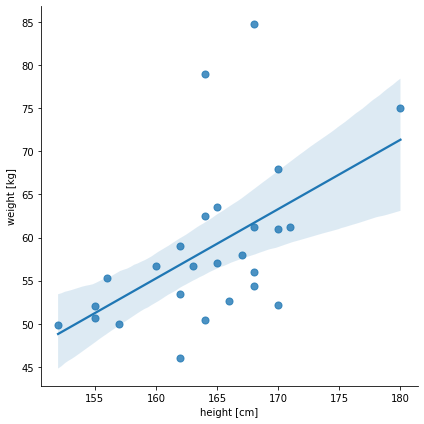

In [9]:
ax = sns.lmplot(x = 'height', 
                y = 'weight', 
                data=df, 
                fit_reg=True, 
                height=6, 
                scatter_kws={'s': 50}
                )

# set labels that are different from the variable names in the dataframe
ax.set(xlabel='height [cm]', 
       ylabel='weight [kg]'
       );

* The plot also shows a shadowed area containing the 95% CI (Confidence Interval) for the regression estimate. 
* A narrow area shows that there is less uncertainty about the estimate. 
   * This usually correspond to having more data for the estimation.

# The Advertising dataset

### Description of the dataset:
The Advertising data set consists of the **sales** of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. 

### Description of the variables:
* `TV`, `radio`, and `newspaper` are the independent variables 
* `sales` is the dependent variable. 

All values are in 1000s, but to make calculations easier big numbers are not used.

In [10]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Advertising.csv'
df = pd.read_csv(path, 
                 index_col=0
                 )
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


* The first market spent a budget of \$230100 in TV ads, \$37800 in radio ads, and \$69200 in newspaper ads and achieved a total of sales of 22100 units.

We can use again `seaborn` to see the relations between independent and dependent variables. We can directly show the linear regression line with the parameter `kind`:

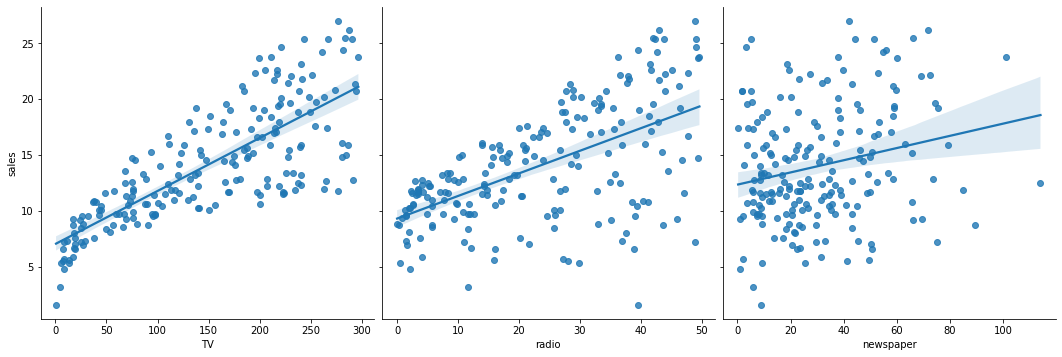

In [11]:
sns.pairplot(df, 
             x_vars=["TV", "radio", "newspaper"], 
             y_vars=["sales"],
             height=5, 
             aspect=1, #the width of the image 
             kind="reg"
             );

We can also calculate the correlation coefficients among all pairs of variables:

In [12]:
c = df.corr()
c

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
unstacked_corr = c.unstack()
unstacked_corr

TV         TV           1.000000
           radio        0.054809
           newspaper    0.056648
           sales        0.782224
radio      TV           0.054809
           radio        1.000000
           newspaper    0.354104
           sales        0.576223
newspaper  TV           0.056648
           radio        0.354104
           newspaper    1.000000
           sales        0.228299
sales      TV           0.782224
           radio        0.576223
           newspaper    0.228299
           sales        1.000000
dtype: float64

In [14]:
sorted_corrA = unstacked_corr.sort_values(kind="quicksort")#.drop_duplicates()
sorted_corrA

TV         radio        0.054809
radio      TV           0.054809
TV         newspaper    0.056648
newspaper  TV           0.056648
           sales        0.228299
sales      newspaper    0.228299
radio      newspaper    0.354104
newspaper  radio        0.354104
radio      sales        0.576223
sales      radio        0.576223
TV         sales        0.782224
sales      TV           0.782224
TV         TV           1.000000
radio      radio        1.000000
newspaper  newspaper    1.000000
sales      sales        1.000000
dtype: float64

In [15]:
sorted_corrB = unstacked_corr.sort_values(kind="quicksort").drop_duplicates()
sorted_corrB

TV         radio        0.054809
           newspaper    0.056648
newspaper  sales        0.228299
radio      newspaper    0.354104
           sales        0.576223
TV         sales        0.782224
           TV           1.000000
dtype: float64

In [16]:
sorted_filter_corr_df = c[((c >= .5) | (c <= -.5)) & (c !=1.000)]
sorted_filter_corr_df

,TV,radio,newspaper,sales
TV,NaN,NaN,NaN,0.782224
radio,NaN,NaN,NaN,0.576223
newspaper,NaN,NaN,NaN,NaN
sales,0.782224,0.576223,NaN,NaN


In [17]:
sorted_filter_corr_df.unstack().sort_values(kind="quicksort").drop_duplicates()

radio  sales    0.576223
TV     sales    0.782224
       TV            NaN
dtype: float64

* The high correlation between `TV` ads and `sales` volume
* The same is evident on the scatter plots too.

# Linear regression: `sales` dependent on `TV`

In [18]:
lm = sm.ols(formula='sales ~ TV', 
            data=df
            ).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

We see that the intercept is 7 and the slope is 0.047. Because all values are in their 1000s, this is what these two numbers mean:

- If there is no `TV` advertising at all, we would expect 7032 units to be sold (the intercept)
- For every 1 dollars in `TV` ads, we can expect an addition of 47 more units sold (0.047)


In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        23:18:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is too much information in this tabble, we only need to focus on:

- R-squared - the goodnees of fit
  *  how well does the regression line approximates the data points)
- Adjusted R-squared 
  * an adjustment of R-squared to take into account the complexity of the model
- The second table on the coefficients: 
  * their values, standard error, the t-test statistic, the P-value for the null hypothesis (which states that the coefficients are 0), the confidence interval: the interval that contains the true parameter values. 

# Multiple Linear Regression

Multiple linear regression is an extension of linear regression to include more than one independent variable: 

$y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + \beta_3*x_3$

Since we have three independent variables for the Advertising dataset, we can create a relationship like this:

$sales = \beta_0 + \beta_1*TV + \beta_2*radio + \beta_3*newspaper$

Build and fit the model with three independent variables:

In [20]:
lm = sm.ols(formula='sales ~ TV + radio + newspaper', 
            data=df
            ).fit()
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        23:18:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are a few things to notice in the statistics this time:

- R-squared is higher than for the models with only one variable, which shows why multiple linear regression is useful
- The estimated coefficients for intercept, `TV` and `radio` are statistically significant (P < 0.05), but `newspaper` is not (P > 0.05). 
  * That means that `TV` and `radio` are associated with `sales` (we rejected that null hypothesis that they are not), but, we cannot reject the null hypothesis for `newspaper`. 
- TV and radio are positively correlated with sales (see the positive values of the coefficients)

If we want to see exact p-values for all coefficients, we can write:

In [22]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

#Regression with `scikit-learn`

Python offers a library that contains implementation of all machine learning algorithms and the setup for using them to fit data and validate results. 

`scikit-learn` expects the data as vectors or matrices, so, we have to convert our dataframe first:

In [23]:
# create X and y
variables = ['TV', 'radio', 'newspaper']
X = df[variables]
y = df.sales
print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (200, 3)
<class 'pandas.core.series.Series'> (200,)


Now we can build and fit the model similarly to `statsmodels`:

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [25]:
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


There is no nice printout summary for the model in `scikit-learn`, but we can access what we need through various features:

In [26]:
lm.score(X, y)

0.8972106381789522

We can easily predict y values based on x values:

  * provide an input as a list of three values for TV, radio, newspaper
  * however, we also need to convert it into the expected "row" of a matrix

In [27]:
#observation = np.array([100, 25, 25]).reshape(1, -1)
#observation

In [28]:
k = [float(x) for x in input("Please enter the numbers (comma in between): ").split(',')]

Please enter the numbers (comma in between): 22, 23, 35


In [29]:
observation = np.array(k).reshape(1, -1) # to make a 2d array. since lm.prediction need 2Darray
observation

array([[22., 23., 35.]])

In [30]:
print("observation:", 
      observation
      )
print("prediction:", 
      lm.predict(observation)
      )

observation: [[22. 23. 35.]]
prediction: [8.2455897]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<!--NAVIGATION-->
< [previous](prev) | [Contents](toc.ipynb) | [next](next.ipynb) >